In [96]:
#
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go


- Hoàng Kiến Thiết
- Nguyễn Trọng Nhật
- Link download datasets: https://drive.google.com/file/d/1iAQzMQIIP8uVrsMQZJReh2mLaN8P_orZ/view?usp=sharing

In [1]:
!gdown --id 1iAQzMQIIP8uVrsMQZJReh2mLaN8P_orZ

Downloading...
From: https://drive.google.com/uc?id=1iAQzMQIIP8uVrsMQZJReh2mLaN8P_orZ
To: /content/occupancy_data.zip
100% 336k/336k [00:00<00:00, 49.5MB/s]


In [2]:
!unzip /content/occupancy_data.zip

Archive:  /content/occupancy_data.zip
  inflating: datatest.txt            
  inflating: datatest2.txt           
  inflating: datatraining.txt        


# Data Description
- Source: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+
- Contents: "no","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"
- Attribute Information:
  + date time year-month-day hour:minute:second
  + Temperature, in Celsius
  + Relative Humidity, %
  + Light, in Lux
  + CO2, in ppm
  + Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status
- Details:
 + Dự đoán trong phòng làm việc đang có người ở hay không bằng cách sử dụng các quan sát môi trường như nhiệt độ, độ ẩm và mức CO2. Dự đoán này có thể giúp ích cho lĩnh vực Hệ thống sưởi, Thông gió và Điều hòa không khí (HVAC). 


In [120]:
import pandas as pd
datatest = pd.read_csv("datatest.txt")
datatest2 = pd.read_csv("datatest2.txt")
datatraining = pd.read_csv("datatraining.txt")

In [ ]:
print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [ ]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [ ]:
datatraining.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


# Data Visualization

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


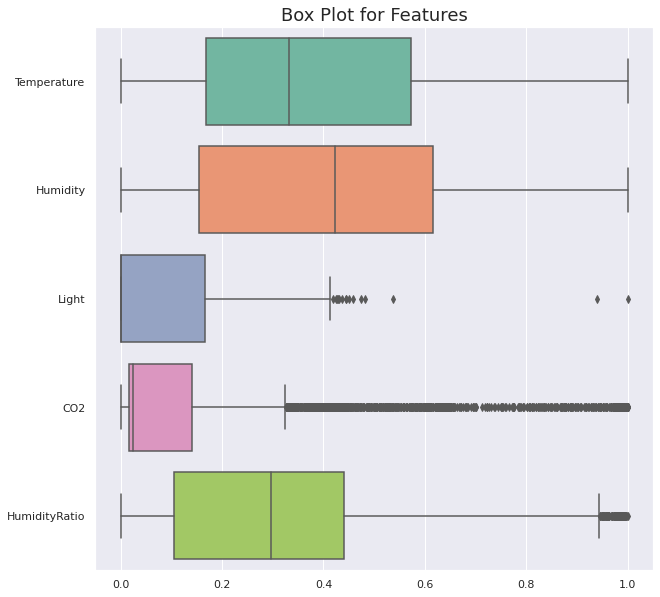

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())

In [81]:
datatraining

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
0,2015-02-04 17:51:00,1.000000,0.470533,0.275490,0.190933,0.557318,1,1
1,2015-02-04 17:51:59,0.992823,0.470332,0.277754,0.186446,0.554807,1,1
2,2015-02-04 17:53:00,0.992823,0.469326,0.275490,0.186136,0.553761,1,1
3,2015-02-04 17:54:00,0.992823,0.467315,0.275490,0.182887,0.551669,1,1
4,2015-02-04 17:55:00,0.980861,0.467315,0.275490,0.180566,0.547851,1,1
...,...,...,...,...,...,...,...,...
8138,2015-02-10 09:29:00,0.490431,0.865013,0.280017,0.231781,0.763986,1,1
8139,2015-02-10 09:29:59,0.490431,0.860431,0.280017,0.233173,0.759782,1,1
8140,2015-02-10 09:30:59,0.502392,0.864901,0.280017,0.238744,0.768438,1,1
8141,2015-02-10 09:32:00,0.502392,0.872276,0.280017,0.252256,0.775226,1,1


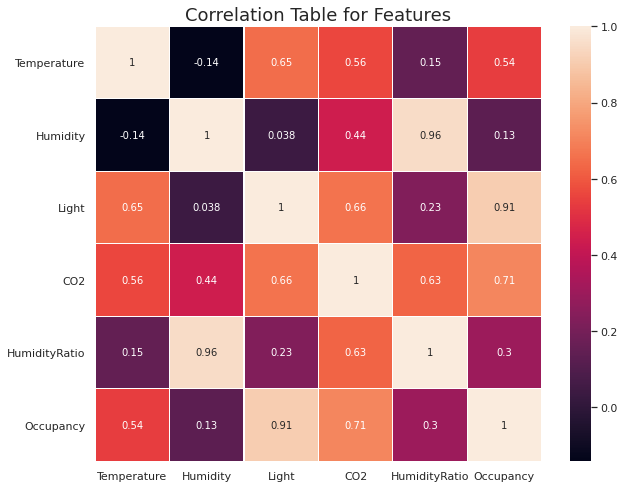

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

Data imbalance

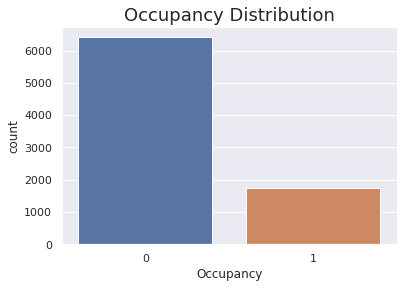

In [ ]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=datatraining)

In [6]:
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



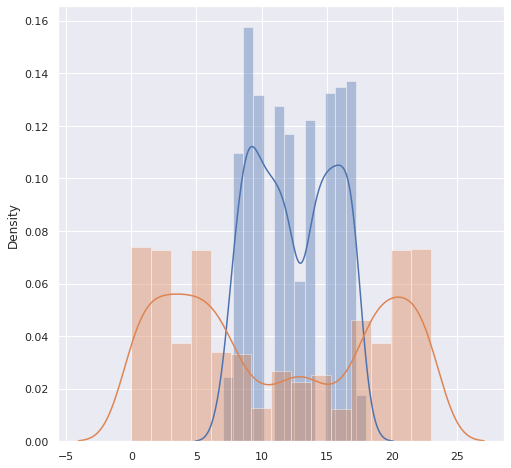

In [9]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

Trong khoảng thời gian từ 07:00 đến 18:00, có người ở trong văn phòng. Ngoài giờ làm việc đó ra thì có thể xem là ko có người ở. 
Với thông tin này, em tạo một tính năng mới từ cột ngày là khoảng thời gian trong ngày:

- 07:00 - 18:00 giờ làm việc : được dán nhãn là 1
- Các giờ còn lại trong ngày không làm việc: được gắn nhãn là 0

In [10]:
datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest['date']]
datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest2['date']]
datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatraining['date']]
datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
562,2015-02-05 03:13:00,0.452153,0.364063,0.000000,0.015627,0.295657,0,0
2271,2015-02-06 07:41:59,0.281100,0.082914,0.280017,0.015318,0.009737,0,1
8037,2015-02-10 07:47:59,0.308612,0.726562,0.000000,0.024911,0.575232,0,1
1956,2015-02-06 02:26:59,0.358852,0.115991,0.000000,0.015627,0.053347,0,0
6801,2015-02-09 11:12:00,0.508373,0.731814,0.300065,0.589200,0.648116,1,1
6086,2015-02-08 23:17:00,0.119617,0.485194,0.000000,0.025530,0.313277,0,0
2074,2015-02-06 04:25:00,0.332536,0.087384,0.000000,0.012739,0.023221,0,0
1119,2015-02-05 12:29:59,0.885167,0.453458,0.345333,0.429058,0.503654,1,1
3095,2015-02-06 21:26:00,0.275120,0.098335,0.000000,0.017175,0.021895,0,0
3167,2015-02-06 22:38:00,0.251196,0.095877,0.000000,0.017794,0.015298,0,0


In [11]:
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

In [12]:
#
print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Validation:')
print(X_validation.shape)
print(y_validation.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(8143, 6)
(8143,)
Validation:
(2665, 6)
(2665,)
Test:
(9752, 6)
(9752,)


# MLP - 4 Models
- Model 1
  + Hidden layers: 1
  + Units: 32, 16, 1
  + Activation: ReLU
  + Epoch: 50
  + Batch Size: 32
  + Without Early stopping
- Model 2
  + Hidden layers: 1
  + Units: 32, 16, 1
  + Activation: ReLU
  + Epoch: 50
  + Batch Size: 32
  + Early stopping
  + Optimizer: rmsprop
- Model 3
  + Hidden layers: 3
  + Units: 100, 64, 32, 16, 1
  + Activation: tanh
  + Epoch: 50
  + Batch Size: 32
  + Early stopping
  + Optimizer: Adam
- Model 4
  + Hidden layers: 3
  + Units: 100, 64, 32, 16, 1
  + Activation: sigmoid
  + Epoch: 30
  + Batch Size: 12
  + Early stopping
  + Optimizer: Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

### Model MLP 01

In [ ]:
# MLP without early stopping
model_MLP_1 = Sequential()
model_MLP_1.add(Dense(32, activation='relu', input_dim=6))
model_MLP_1.add(Dense(16, activation='relu'))
model_MLP_1.add(Dense(1, activation='sigmoid'))
model_MLP_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_MLP_1 = model_MLP_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50
255/255 [==============================] - 2s 3ms/step - loss: 0.4772 - accuracy: 0.9424 - val_loss: 0.1300 - val_accuracy: 0.9640
Epoch 2/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9763 - val_loss: 0.0961 - val_accuracy: 0.9670
Epoch 3/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9827 - val_loss: 0.0856 - val_accuracy: 0.9719
Epoch 4/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.9851 - val_loss: 0.0829 - val_accuracy: 0.9719
Epoch 5/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9839 - val_loss: 0.0824 - val_accuracy: 0.9771
Epoch 6/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9867 - val_loss: 0.0792 - val_accuracy: 0.9767
Epoch 7/50
255/255 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9842 - val_loss: 0.0783 - val_accuracy: 0.9767
Epoch 

In [ ]:
accuracy_MLP_1 = history_MLP_1.history['accuracy']
val_accuracy_MLP_1 = history_MLP_1.history['val_accuracy']

In [97]:
import plotly.offline as py
from plotly.offline import iplot
from plotly.graph_objs import Scatter
py.init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_MLP_1)), y=accuracy_MLP_1,
                    name='Training Accuracy Model MLP 1', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_MLP_1)), y=val_accuracy_MLP_1,
                    name='Validation Accuracy Model MLP 1', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model MLP 1",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)


### Model MLP 02

In [ ]:
from keras import backend as K 
K.clear_session()

In [ ]:
model_MLP_2 = Sequential()
model_MLP_2.add(Dense(32, activation='relu', input_dim=6))
model_MLP_2.add(Dense(16, activation='relu'))
model_MLP_2.add(Dense(1, activation='relu'))
model_MLP_2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_MLP_2_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)

In [ ]:
history_MLP_2 = model_MLP_2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2097 - accuracy: 0.9219 - val_loss: 0.1861 - val_accuracy: 0.9572

Epoch 00001: val_accuracy improved from -inf to 0.95722, saving model to best_model_MLP_2_.h5
Epoch 2/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9770 - val_loss: 0.1207 - val_accuracy: 0.9779

Epoch 00002: val_accuracy improved from 0.95722 to 0.97786, saving model to best_model_MLP_2_.h5
Epoch 3/50
255/255 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9856 - val_loss: 0.1350 - val_accuracy: 0.9786

Epoch 00003: val_accuracy improved from 0.97786 to 0.97861, saving model to best_model_MLP_2_.h5
Epoch 00003: early stopping


In [ ]:
accuracy_MLP_2 = history_MLP_2.history['accuracy']
val_accuracy_MLP_2 = history_MLP_2.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_MLP_2)), y=accuracy_MLP_2,
                    name='Training Accuracy Model MLP 2', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_MLP_2)), y=val_accuracy_MLP_2,
                    name='Validation Accuracy Model MLP 2', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model MLP 2",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

### Model MLP 03

In [ ]:
K.clear_session()
#
model_MLP_3 = Sequential()
model_MLP_3.add(Dense(100, activation='tanh', input_dim=6, kernel_regularizer=l1(l=0.01)))
model_MLP_3.add(Dense(64, activation='tanh', kernel_regularizer=l1(l=0.01)))
model_MLP_3.add(Dense(32, activation='tanh', kernel_regularizer=l1(l=0.01)))
model_MLP_3.add(Dense(16, activation='tanh', kernel_regularizer=l1(l=0.01)))
model_MLP_3.add(Dense(1, activation='tanh'))
model_MLP_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_MLP_3_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
#
history_MLP_3 = model_MLP_3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 6.6517 - accuracy: 0.9095 - val_loss: 0.6718 - val_accuracy: 0.9422

Epoch 00001: val_accuracy improved from -inf to 0.94221, saving model to best_model_MLP_3_.h5
Epoch 2/50
255/255 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.9745 - val_loss: 0.3290 - val_accuracy: 0.9700

Epoch 00002: val_accuracy improved from 0.94221 to 0.96998, saving model to best_model_MLP_3_.h5
Epoch 3/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2954 - accuracy: 0.9836 - val_loss: 0.2806 - val_accuracy: 0.9767

Epoch 00003: val_accuracy improved from 0.96998 to 0.97674, saving model to best_model_MLP_3_.h5
Epoch 4/50
255/255 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.9872 - val_loss: 0.2533 - val_accuracy: 0.9779

Epoch 00004: val_accuracy improved from 0.97674 to 0.97786, saving model to best_model_MLP_3_.h5
Epoch 5/50
255/255 [=======================

In [ ]:
accuracy_MLP_3 = history_MLP_3.history['accuracy']
val_accuracy_MLP_3 = history_MLP_3.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_MLP_3)), y=accuracy_MLP_3,
                    name='Training Accuracy Model MLP 3', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_MLP_3)), y=val_accuracy_MLP_3,
                    name='Validation Accuracy Model MLP 3', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model MLP 3",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

### Model MLP 04

In [ ]:
from keras import backend as K 
K.clear_session()

In [ ]:
# Structures kahsc
model_MLP_4 = Sequential()
model_MLP_4.add(Dense(100, activation='sigmoid', input_dim=6, kernel_regularizer=l1(l=0.01)))
model_MLP_4.add(Dense(64, activation='sigmoid', kernel_regularizer=l1(l=0.01)))
model_MLP_4.add(Dense(32, activation='sigmoid', kernel_regularizer=l1(l=0.01)))
model_MLP_4.add(Dense(16, activation='sigmoid', kernel_regularizer=l1(l=0.01)))
model_MLP_4.add(Dense(1, activation='sigmoid'))
model_MLP_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_MLP_4_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
#
history_MLP_4 = model_MLP_4.fit(X_train, y_train, epochs=30, batch_size=12, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/30
679/679 [==============================] - 2s 2ms/step - loss: 3.9290 - accuracy: 0.7766 - val_loss: 0.7438 - val_accuracy: 0.6353

Epoch 00001: val_accuracy improved from -inf to 0.63527, saving model to best_model_MLP_4_.h5
Epoch 2/30
679/679 [==============================] - 1s 2ms/step - loss: 0.5237 - accuracy: 0.7918 - val_loss: 0.7281 - val_accuracy: 0.6353

Epoch 00002: val_accuracy did not improve from 0.63527
Epoch 3/30
679/679 [==============================] - 1s 2ms/step - loss: 0.5240 - accuracy: 0.7915 - val_loss: 0.7213 - val_accuracy: 0.6353

Epoch 00003: val_accuracy did not improve from 0.63527
Epoch 4/30
679/679 [==============================] - 1s 2ms/step - loss: 0.5229 - accuracy: 0.7927 - val_loss: 0.7154 - val_accuracy: 0.6353

Epoch 00004: val_accuracy did not improve from 0.63527
Epoch 5/30
679/679 [==============================] - 1s 2ms/step - loss: 0.5387 - accuracy: 0.7805 - val_loss: 0.7272 - val_accuracy: 0.6353

Epoch 00005: val_accuracy 

In [ ]:
accuracy_MLP_4 = history_MLP_4.history['accuracy']
val_accuracy_MLP_4 = history_MLP_4.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_MLP_4)), y=accuracy_MLP_4,
                    name='Training Accuracy Model MLP 4', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_MLP_4)), y=val_accuracy_MLP_4,
                    name='Validation Accuracy Model MLP 4', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model MLP 4",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [ ]:
loss1 = history_MLP_1.history['loss']
val_loss1 = history_MLP_1.history['val_loss']
loss2 = history_MLP_2.history['loss']
val_loss2 = history_MLP_2.history['val_loss']
loss3 = history_MLP_3.history['loss']
val_loss3 = history_MLP_3.history['val_loss']
loss4 = history_MLP_4.history['loss']
val_loss4 = history_MLP_4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss Model MLP 1', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss Model MLP 1', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss Model MLP 2', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss Model MLP 2', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss Model MLP 3', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss Model MLP 3', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss Model MLP 4', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss Model MLP 4', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different MLP Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

# Prediction and Evaluation

#### Prediction Model MLP 1

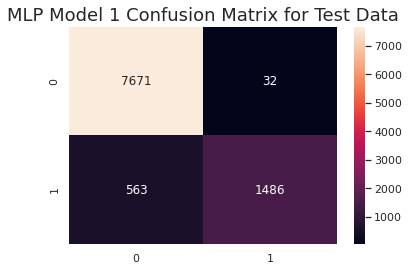

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_MLP_1.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("MLP Model 1 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
print("Accuracy for MLP model 1 on test data: {}%".format(round((model_MLP_1.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 0s 909us/step - loss: 0.1792 - accuracy: 0.9424
Accuracy for MLP model 1 on test data: 94.24%


#### Prediction Model MLP 2

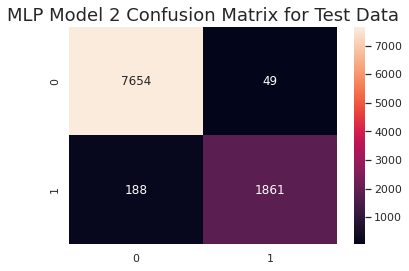

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_MLP_2.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("MLP Model 2 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
print("Accuracy for MLP model 2 on test data: {}%".format(round((model_MLP_2.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 0s 816us/step - loss: 0.1052 - accuracy: 0.9766
Accuracy for MLP model 2 on test data: 97.66%


#### Prediction Model MLP 3

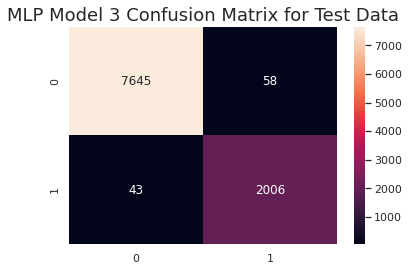

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_MLP_3.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("MLP Model 3 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
print("Accuracy for MLP model 3 on test data: {}%".format(round((model_MLP_3.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 0s 977us/step - loss: 0.1687 - accuracy: 0.9915
Accuracy for MLP model 3 on test data: 99.15%


#### Prediction Model MLP 4

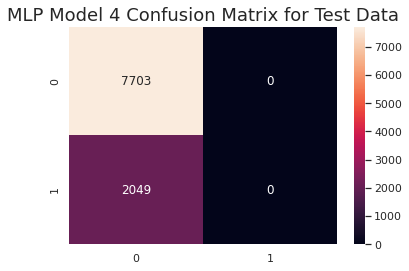

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_MLP_4.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("MLP Model 4 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
print("Accuracy for MLP model 4 on test data: {}%".format(round((model_MLP_4.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 0s 926us/step - loss: 0.5258 - accuracy: 0.7899
Accuracy for MLP model 4 on test data: 78.99%


# LSTM - 4 Models
- Model 1
  + Hidden layers: 3
  + Units: 16, 32, 32, ,16, 1
  + Activation: sigmoid
  + Epoch: 30
  + Batch Size: 16
  + Early stopping 
- Model 2
  + Hidden layers: 2
  + Units: 64, 32, 16, 1
  + Activation: tanh
  + Epoch: 30
  + Batch Size: 16
  + Early stopping 
- Model 3
  + Hidden layers: 2
  + Units: 64, 32, 16, 1
  + Activation: ReLU
  + Epoch: 15
  + Batch Size: 9
  + Early stopping 
- Model 4
  + Hidden layers: 2
  + Units: 90, 81, 63, 45, 27, 9, 1
  + Activation: Sigmoid
  + Epoch: 100
  + Batch Size: 81
  + Early stopping 

##### Preparing Data

In [73]:
import pandas as pd
datatest = pd.read_csv("datatest.txt")
datatest2 = pd.read_csv("datatest2.txt")
datatraining = pd.read_csv("datatraining.txt")
# set index
datatest = datatest.set_index('date')
datatest2 = datatest2.set_index('date')
datatraining = datatraining.set_index('date')
datatraining

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1


In [74]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#
scaler = MinMaxScaler()
occupancy_scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
#
scaler.fit(np.array(datatraining[columns].to_numpy()))
#
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

In [75]:
def reshape_X_y_(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [76]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = reshape_X_y_(datatraining, datatraining.Occupancy, time_steps)
X_validation, y_validation = reshape_X_y_(datatest, datatest.Occupancy, time_steps)
X_test, y_test = reshape_X_y_(datatest2, datatest2.Occupancy, time_steps)

In [84]:
X_train.shape[2]

6

In [78]:
X_train = np.asarray(X_train.astype(np.float64))
y_train = np.asarray(y_train.astype(np.float64))


X_validation = np.asarray(X_validation.astype(np.float64))
y_validation = np.asarray(y_validation.astype(np.float64))

X_test = np.asarray(X_test.astype(np.float64))
y_test = np.asarray(y_test.astype(np.float64))

In [80]:
#
print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Validation:')
print(X_validation.shape)
print(y_validation.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(8133, 10, 6)
(8133,)
Validation:
(2655, 10, 6)
(2655,)
Test:
(9742, 10, 6)
(9742,)


#### LSTM Model 0 - Example Model

In [90]:
from keras import backend as K 
K.clear_session()
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

In [87]:
# this is Example LSTM Model
data_dim = 6
timesteps = 10
num_classes = 1

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(16, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(16))  # return a single vector of dimension 32
model.add(Dense(1, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10, 16)            1472      
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 16)            2112      
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 5,713
Trainable params: 5,713
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_LSTM_0_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
#
history_LSTM_model_0 = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/30
509/509 [==============================] - 7s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2114 - val_loss: 0.0000e+00 - val_accuracy: 0.3623

Epoch 00001: val_accuracy improved from -inf to 0.36234, saving model to best_model_LSTM_0_.h5
Epoch 2/30
509/509 [==============================] - 7s 13ms/step - loss: 0.0000e+00 - accuracy: 0.2114 - val_loss: 0.0000e+00 - val_accuracy: 0.3623

Epoch 00002: val_accuracy did not improve from 0.36234
Epoch 00002: early stopping


### LSTM Model 1

In [92]:
K.clear_session()

In [93]:
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
#
data_dim = 6
timesteps = 10
num_classes = 1
#
model_LSTM_1 = Sequential()
# 1st 
model_LSTM_1.add(LSTM(units = 16, return_sequences = True, input_shape = (timesteps, data_dim)))
# 2nd
model_LSTM_1.add(LSTM(units = 32, return_sequences = True))
# 3rd
model_LSTM_1.add(LSTM(units = 32, return_sequences = True))
# 4th
model_LSTM_1.add(LSTM(units = 16))
# output layer
model_LSTM_1.add(Dense(units = 1, activation='sigmoid'))

model_LSTM_1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
print(model_LSTM_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 16)            1472      
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            6272      
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 32)            8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 19,217
Trainable params: 19,217
Non-trainable params: 0
_________________________________________________________________
None


In [94]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_LSTM_1_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)

# fit model
history_LSTM_1 = model_LSTM_1.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/30
509/509 [==============================] - 17s 22ms/step - loss: 0.0666 - accuracy: 0.9298 - val_loss: 0.0295 - val_accuracy: 0.9676

Epoch 00001: val_accuracy improved from -inf to 0.96761, saving model to best_model_LSTM_1_.h5
Epoch 2/30
509/509 [==============================] - 9s 18ms/step - loss: 0.0153 - accuracy: 0.9833 - val_loss: 0.0255 - val_accuracy: 0.9759

Epoch 00002: val_accuracy improved from 0.96761 to 0.97589, saving model to best_model_LSTM_1_.h5
Epoch 3/30
509/509 [==============================] - 9s 18ms/step - loss: 0.0129 - accuracy: 0.9854 - val_loss: 0.0146 - val_accuracy: 0.9823

Epoch 00003: val_accuracy improved from 0.97589 to 0.98230, saving model to best_model_LSTM_1_.h5
Epoch 4/30
509/509 [==============================] - 9s 18ms/step - loss: 0.0072 - accuracy: 0.9924 - val_loss: 0.0095 - val_accuracy: 0.9895

Epoch 00004: val_accuracy improved from 0.98230 to 0.98945, saving model to best_model_LSTM_1_.h5
Epoch 5/30
509/509 [==============

In [98]:
accuracy_LSTM_1 = history_LSTM_1.history['accuracy']
val_accuracy_LSTM_1 = history_LSTM_1.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_LSTM_1)), y=accuracy_LSTM_1,
                    name='Training Accuracy Model LSTM 1', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_LSTM_1)), y=val_accuracy_LSTM_1,
                    name='Validation Accuracy Model LSTM 1', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model LSTM 1",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

### LSTM Model 2

In [99]:
K.clear_session()

In [100]:
model_LSTM_2 = Sequential()
# 1st 
model_LSTM_2.add(LSTM(units = 64, return_sequences = True, input_shape = (timesteps, data_dim)))
# 2nd
model_LSTM_2.add(LSTM(units = 32, return_sequences = True))
# 3rd
model_LSTM_2.add(LSTM(units = 16))
# output layer
model_LSTM_2.add(Dense(units = 1, activation='tanh'))

model_LSTM_2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
print(model_LSTM_2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            18176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 33,745
Trainable params: 33,745
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_LSTM_2_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
#
history_LSTM_2 = model_LSTM_2.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/30
509/509 [==============================] - 14s 18ms/step - loss: 0.0299 - accuracy: 0.9655 - val_loss: 0.0190 - val_accuracy: 0.9766

Epoch 00001: val_accuracy improved from -inf to 0.97665, saving model to best_model_LSTM_2_.h5
Epoch 2/30
509/509 [==============================] - 8s 15ms/step - loss: 0.0122 - accuracy: 0.9862 - val_loss: 0.0203 - val_accuracy: 0.9834

Epoch 00002: val_accuracy improved from 0.97665 to 0.98343, saving model to best_model_LSTM_2_.h5
Epoch 00002: early stopping


In [102]:
accuracy_LSTM_2 = history_LSTM_2.history['accuracy']
val_accuracy_LSTM_2 = history_LSTM_2.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_LSTM_2)), y=accuracy_LSTM_2,
                    name='Training Accuracy Model LSTM 2', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_LSTM_2)), y=val_accuracy_LSTM_2,
                    name='Validation Accuracy Model LSTM 2', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model LSTM 2",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

### LSTM Model 3

In [103]:
K.clear_session()

In [104]:
model_LSTM_3 = Sequential()
# 1st 
model_LSTM_3.add(LSTM(units = 64, return_sequences = True, input_shape = (timesteps, data_dim)))
model_LSTM_3.add(Dropout(0.2))
# 2nd
model_LSTM_3.add(LSTM(units = 32, return_sequences = True))
model_LSTM_3.add(Dropout(0.2))
# 3rd
model_LSTM_3.add(LSTM(units = 16))
model_LSTM_3.add(Dropout(0.2))
# output layer
model_LSTM_3.add(Dense(units = 1, activation='relu'))
model_LSTM_3.add(Dropout(0.2))

model_LSTM_3.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
print(model_LSTM_3.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            18176     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [105]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_LSTM_3_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
#
history_LSTM_3 = model_LSTM_3.fit(X_train, y_train, epochs=15, batch_size=9, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/15
904/904 [==============================] - 20s 17ms/step - loss: 0.2122 - accuracy: 0.7878 - val_loss: 0.3623 - val_accuracy: 0.6377

Epoch 00001: val_accuracy improved from -inf to 0.63766, saving model to best_model_LSTM_3_.h5
Epoch 2/15
904/904 [==============================] - 14s 15ms/step - loss: 0.2146 - accuracy: 0.7854 - val_loss: 0.3623 - val_accuracy: 0.6377

Epoch 00002: val_accuracy did not improve from 0.63766
Epoch 00002: early stopping


In [106]:
accuracy_LSTM_3 = history_LSTM_3.history['accuracy']
val_accuracy_LSTM_3 = history_LSTM_3.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_LSTM_3)), y=accuracy_LSTM_3,
                    name='Training Accuracy Model LSTM 3', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_LSTM_3)), y=val_accuracy_LSTM_3,
                    name='Validation Accuracy Model LSTM 3', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model LSTM 3",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

### LSTM Model 4

In [107]:
K.clear_session()

In [109]:
model_LSTM_4 = Sequential()
# 1st 
model_LSTM_4.add(LSTM(units = 90, return_sequences = True, input_shape = (timesteps, data_dim)))
# 2nd
model_LSTM_4.add(LSTM(units = 81, return_sequences = True))
# 3rd
model_LSTM_4.add(LSTM(units = 63, return_sequences = True))
# 4th
model_LSTM_4.add(LSTM(units = 45, return_sequences = True))
# 5th
model_LSTM_4.add(LSTM(units = 27, return_sequences = True))
# 6th
model_LSTM_4.add(LSTM(units = 9))
# output layer
model_LSTM_4.add(Dense(units = 1, activation='sigmoid'))

model_LSTM_4.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
print(model_LSTM_4.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10, 90)            34920     
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 81)            55728     
_________________________________________________________________
lstm_8 (LSTM)                (None, 10, 63)            36540     
_________________________________________________________________
lstm_9 (LSTM)                (None, 10, 45)            19620     
_________________________________________________________________
lstm_10 (LSTM)               (None, 10, 27)            7884      
_________________________________________________________________
lstm_11 (LSTM)               (None, 9)                 1332      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [110]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model_LSTM_4_.h5', monitor='val_accuracy', mode='auto', verbose=1, save_best_only=True)
#
history_LSTM_4 = model_LSTM_4.fit(X_train, y_train, epochs=100, batch_size=81, validation_data=(X_validation, y_validation), callbacks=[es, mc])

Epoch 1/100
101/101 [==============================] - 18s 84ms/step - loss: 0.1167 - accuracy: 0.8558 - val_loss: 0.0378 - val_accuracy: 0.9589

Epoch 00001: val_accuracy improved from -inf to 0.95895, saving model to best_model_LSTM_4_.h5
Epoch 2/100
101/101 [==============================] - 6s 61ms/step - loss: 0.0180 - accuracy: 0.9814 - val_loss: 0.0310 - val_accuracy: 0.9665

Epoch 00002: val_accuracy improved from 0.95895 to 0.96648, saving model to best_model_LSTM_4_.h5
Epoch 3/100
101/101 [==============================] - 6s 61ms/step - loss: 0.0192 - accuracy: 0.9794 - val_loss: 0.0275 - val_accuracy: 0.9687

Epoch 00003: val_accuracy improved from 0.96648 to 0.96874, saving model to best_model_LSTM_4_.h5
Epoch 4/100
101/101 [==============================] - 6s 61ms/step - loss: 0.0152 - accuracy: 0.9808 - val_loss: 0.0254 - val_accuracy: 0.9718

Epoch 00004: val_accuracy improved from 0.96874 to 0.97175, saving model to best_model_LSTM_4_.h5
Epoch 5/100
101/101 [=========

In [111]:
accuracy_LSTM_4 = history_LSTM_4.history['accuracy']
val_accuracy_LSTM_4 = history_LSTM_4.history['val_accuracy']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(accuracy_LSTM_4)), y=accuracy_LSTM_4,
                    name='Training Accuracy Model LSTM 4', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_accuracy_LSTM_4)), y=val_accuracy_LSTM_4,
                    name='Validation Accuracy Model LSTM 4', line = dict(color='firebrick')))

fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Accuracy',
                  title={'text': "Training and Validation Accuracy for Model LSTM 4",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [112]:
loss1 = history_LSTM_1.history['loss']
val_loss1 = history_LSTM_1.history['val_loss']
loss2 = history_LSTM_2.history['loss']
val_loss2 = history_LSTM_2.history['val_loss']
loss3 = history_LSTM_3.history['loss']
val_loss3 = history_LSTM_3.history['val_loss']
loss4 = history_LSTM_4.history['loss']
val_loss4 = history_LSTM_4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss Model LSTM 1', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss Model LSTM 1', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss Model LSTM 2', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss Model LSTM 2', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss Model LSTM 3', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss Model LSTM 3', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss Model LSTM 4', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss Model LSTM 4', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

### Prediction and Evaluation

#### Prediction Model LSTM 1

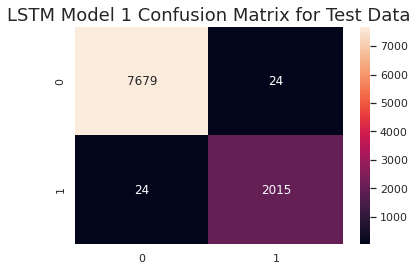

In [113]:
from sklearn.metrics import confusion_matrix
y_pred = model_LSTM_1.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("LSTM Model 1 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
print("Accuracy for LSTM Model 1 on test data: {}%".format(round((model_LSTM_1.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9153
Accuracy for LSTM Model 1 on test data: 91.53%


#### Prediction Model LSTM 2

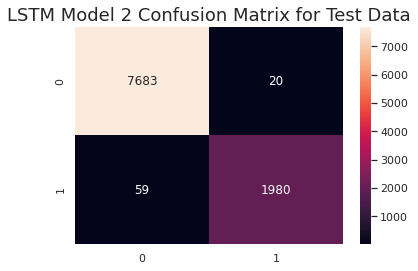

In [114]:
from sklearn.metrics import confusion_matrix
y_pred = model_LSTM_2.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("LSTM Model 2 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [115]:
print("Accuracy for LSTM Model 2 on test data: {}%".format(round((model_LSTM_2.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 2s 5ms/step - loss: 0.0092 - accuracy: 0.9927
Accuracy for LSTM Model 2 on test data: 99.27%


#### Prediction Model LSTM 3

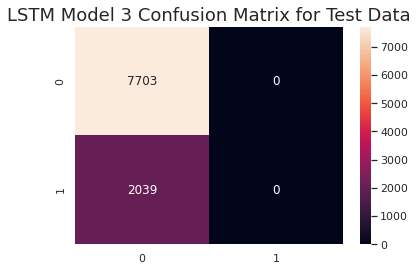

In [116]:
from sklearn.metrics import confusion_matrix
y_pred = model_LSTM_3.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("LSTM Model 3 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [117]:
print("Accuracy for LSTM Model 3 on test data: {}%".format(round((model_LSTM_3.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 3s 6ms/step - loss: 0.2093 - accuracy: 0.7907
Accuracy for LSTM Model 3 on test data: 79.07%


#### Prediction Model LSTM 4

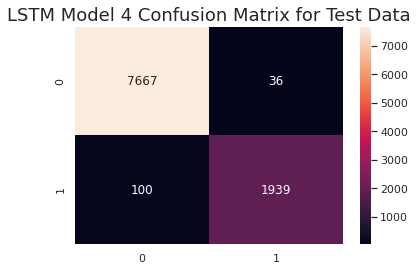

In [118]:
from sklearn.metrics import confusion_matrix
y_pred = model_LSTM_4.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("LSTM Model 4 Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [119]:
print("Accuracy for LSTM Model 4 on test data: {}%".format(round((model_LSTM_4.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 3s 10ms/step - loss: 0.0183 - accuracy: 0.9875
Accuracy for LSTM Model 4 on test data: 98.75%


# Summary

In [ ]:
print('MLP Model 1: ')
print(f'--- Accuracy for MLP Model 1 on validation data: {val_accuracy_MLP_1[-1]*100:0.2f}% ---')
print("--- Accuracy for MLP model 2 on test data: {}% ---".format(round((model_MLP_1.evaluate(X_test, y_test)[1]*100),2)))

MLP Model 1: 
--- Accuracy for MLP Model 1 on validation data: 91.89% ---
305/305 [==============================] - 0s 968us/step - loss: 0.1792 - accuracy: 0.9424
--- Accuracy for MLP model 2 on test data: 94.24% ---


In [ ]:
print('MLP Model 2: ')
print(f'--- Accuracy for MLP Model 2 on validation data: {val_accuracy_MLP_2[-1]*100:0.2f}% ---')
print("--- Accuracy for MLP model 2 on test data: {}% ---".format(round((model_MLP_2.evaluate(X_test, y_test)[1]*100),2)))

MLP Model 2: 
--- Accuracy for MLP Model 2 on validation data: 97.86% ---
305/305 [==============================] - 0s 973us/step - loss: 0.1052 - accuracy: 0.9766
--- Accuracy for MLP model 2 on test data: 97.66% ---


In [ ]:
print('MLP Model 3: ')
print(f'--- Accuracy for MLP Model 3 on validation data: {val_accuracy_MLP_3[-1]*100:0.2f}% ---')
print("--- Accuracy for MLP model 3 on test data: {}% ---".format(round((model_MLP_3.evaluate(X_test, y_test)[1]*100),2)))

MLP Model 3: 
--- Accuracy for MLP Model 3 on validation data: 97.82% ---
305/305 [==============================] - 0s 936us/step - loss: 0.1687 - accuracy: 0.9915
--- Accuracy for MLP model 3 on test data: 99.15% ---


In [ ]:
print('MLP Model 4: ')
print(f'--- Accuracy for MLP Model 4 on validation data: {val_accuracy_MLP_4[-1]*100:0.2f}% ---')
print("--- Accuracy for MLP model 4 on test data: {}% ---".format(round((model_MLP_4.evaluate(X_test, y_test)[1]*100),2)))

MLP Model 4: 
--- Accuracy for MLP Model 4 on validation data: 63.53% ---
305/305 [==============================] - 0s 912us/step - loss: 0.5258 - accuracy: 0.7899
--- Accuracy for MLP model 4 on test data: 78.99% ---


In [121]:
print('LSTM Model 1: ')
print(f'--- Accuracy for LSTM Model 1 on validation data: {val_accuracy_LSTM_1[-1]*100:0.2f}% ---')
print("--- Accuracy for LSTM model 1 on test data: {}% ---".format(round((model_LSTM_1.evaluate(X_test, y_test)[1]*100),2)))

LSTM Model 1: 
--- Accuracy for LSTM Model 1 on validation data: 99.02% ---
305/305 [==============================] - 2s 5ms/step - loss: 0.0046 - accuracy: 0.9951
--- Accuracy for LSTM model 1 on test data: 99.51% ---


In [122]:
print('LSTM Model 2: ')
print(f'--- Accuracy for LSTM Model 2 on validation data: {val_accuracy_LSTM_2[-1]*100:0.2f}% ---')
print("--- Accuracy for LSTM model 2 on test data: {}% ---".format(round((model_LSTM_2.evaluate(X_test, y_test)[1]*100),2)))

LSTM Model 2: 
--- Accuracy for LSTM Model 2 on validation data: 98.34% ---
305/305 [==============================] - 1s 5ms/step - loss: 0.0092 - accuracy: 0.9927
--- Accuracy for LSTM model 2 on test data: 99.27% ---


In [123]:
print('LSTM Model 3: ')
print(f'--- Accuracy for LSTM Model 3 on validation data: {val_accuracy_LSTM_3[-1]*100:0.2f}% ---')
print("--- Accuracy for LSTM model 3 on test data: {}% ---".format(round((model_LSTM_3.evaluate(X_test, y_test)[1]*100),2)))

LSTM Model 3: 
--- Accuracy for LSTM Model 3 on validation data: 63.77% ---
305/305 [==============================] - 2s 5ms/step - loss: 0.2093 - accuracy: 0.7907
--- Accuracy for LSTM model 3 on test data: 79.07% ---


In [124]:
print('LSTM Model 4: ')
print(f'--- Accuracy for LSTM Model 4 on validation data: {val_accuracy_LSTM_4[-1]*100:0.2f}% ---')
print("--- Accuracy for LSTM model 4 on test data: {}% ---".format(round((model_LSTM_4.evaluate(X_test, y_test)[1]*100),2)))

LSTM Model 4: 
--- Accuracy for LSTM Model 4 on validation data: 97.33% ---
305/305 [==============================] - 3s 10ms/step - loss: 0.0183 - accuracy: 0.9875
--- Accuracy for LSTM model 4 on test data: 98.75% ---
